# Linear Regression
Use linear regression, to predict brain weight using head size based on headbrain.csv dataset

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

## Reading Data

In [2]:
data = pd.read_csv('headbrain.csv')
print(data.shape)
data.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [5]:
X = data['Head Size(cm^3)'].values
Y = data['Brain Weight(grams)'].values

Mean x and y

In [6]:
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [7]:
n=len(X)

Using the formula to calculate b1 and b0

In [8]:
numer = 0
denom = 0
for i in range(n):
    numer += (X[i]-mean_x)*(Y[i]-mean_y)
    denom += (X[i]-mean_x) ** 2

b1 = numer/denom
b0 = mean_y - b1*mean_x

print(b1, b0)

0.26342933948939945 325.57342104944223


In [9]:
max(X)

4747

Plotting graphically

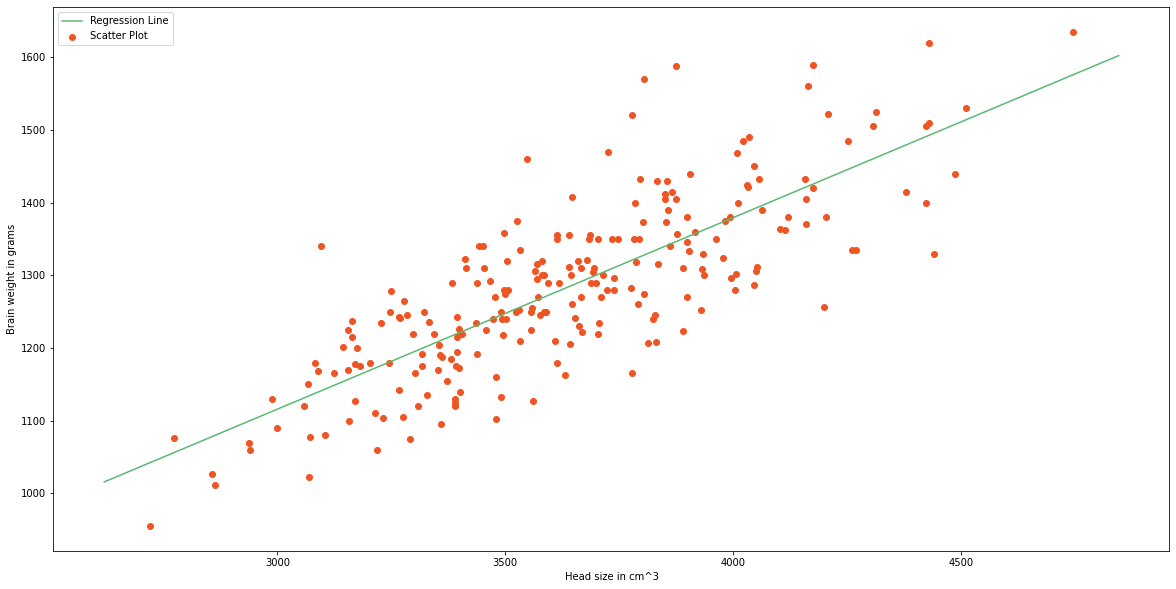

In [10]:
max_x = np.max(X) + 100
min_x = np.min(X) - 100

x = np.linspace(min_x, max_x, 1000)
y = b1*x + b0

plt.plot(x, y, c='#58b970', label='Regression Line')

plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Head size in cm^3')
plt.ylabel('Brain weight in grams')
plt.legend()
plt.show()

In [11]:
ss_t = 0            # Total sum of squares
ss_r = 0            # Total sum of squares of residuals

for i in range(n):
    y_pred = b1*X[i] + b0
    ss_t += (Y[i] - mean_y)**2
    ss_r += (Y[i] - y_pred)**2
r2 = 1 - ss_r/ss_t
print(r2)

0.6393117199570003


## The obtained R^2 value is pretty good

# Using scikit learn

In [14]:
from sklearn.linear_model import LinearRegression

# Cannot use rank 1 matrix in scikit learn
X = X.reshape(n, 1)
# Creating model 
reg = LinearRegression()
# Fitting training model
reg = reg.fit(X, Y)
# Y prediction
Y_pred = reg.predict(X)

# Calculating R^2 score
r2_score = reg.score(X, Y)

print(r2_score)

0.639311719957
